In [1]:
## Attempted by Stephen ##
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress



In [2]:
transit = pd.read_csv("../Cleaned Data/Passenger use by year.csv")
total_consumption= pd.read_csv("../Cleaned Data/Global_Consumption_and_Temperature.csv")
natural_gas = pd.read_csv("../Cleaned Data/natural_gas_consumption.csv")
nuclear = pd.read_csv("../Cleaned Data/nuclear_consumption.csv")
petroleum = pd.read_csv("../Cleaned Data/petroleum_consumption.csv")

In [3]:
total_consumption.head()

,Unnamed: 0,Year,Consumption,Temperature Delta
0,0,1986,649.068803,0.20980
1,1,1987,669.186533,0.34980
2,2,1988,695.270905,0.39285
3,3,1989,704.715294,0.29350
4,4,1990,717.919091,0.43640


In [4]:
# consumption_df = total_consumption.rename(columns={"total energy consumption (quad Btu)":"Region"}).set_index("Region")
# consumption_df.columns.name="Years"
# consumption_df.reset_index()
# # consumption_df.set_index(["Year","Region"])

# # consumption_df

In [5]:

# consumption_t = consumption_df.T
# consumption_t.index.name = "Year"
# consumption_t.pivot()

In [6]:
# transit_df = transit.set_index(["Year","Country"])
transit_2017 = transit.loc[transit["Year"]<2017]
transit_gb = transit_2017.groupby(["Year"])
transit_final = transit_gb.sum()
transit_final

,YEAR,PowerCode Code,Reference Period Code,Reference Period,Value
Year,,,,,
2000,274000,822,0.0,0.0,3.262011e+07
2001,284142,852,0.0,0.0,3.419915e+07
2002,288288,864,0.0,0.0,3.554231e+07
2003,288432,864,0.0,0.0,3.616053e+07
2004,288576,864,0.0,0.0,3.772118e+07
2005,292730,876,0.0,0.0,3.966490e+07
2006,292876,876,0.0,0.0,4.091987e+07
2007,297036,888,0.0,0.0,4.597529e+07
2008,297184,888,0.0,0.0,4.762507e+07


In [7]:
transit

,COUNTRY,Country,VARIABLE,Variable,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,KOR,Korea,T-PASS-RD-TOT,Road passenger transport,2001,2001,PKM,Passenger-kilometres,6,Millions,NaN,NaN,267525.000000,NaN,NaN
1,KOR,Korea,T-PASS-RD-TOT,Road passenger transport,2002,2002,PKM,Passenger-kilometres,6,Millions,NaN,NaN,244955.000000,NaN,NaN
2,KOR,Korea,T-PASS-RD-TOT,Road passenger transport,2003,2003,PKM,Passenger-kilometres,6,Millions,NaN,NaN,238861.000000,NaN,NaN
3,KOR,Korea,T-PASS-RD-TOT,Road passenger transport,2004,2004,PKM,Passenger-kilometres,6,Millions,NaN,NaN,190183.000000,NaN,NaN
4,KOR,Korea,T-PASS-RD-TOT,Road passenger transport,2005,2005,PKM,Passenger-kilometres,6,Millions,NaN,NaN,200779.000000,B,Break
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2606,CHL,Chile,T-PASS-RL-TOT,Rail passenger transport,2014,2014,PKM,Passenger-kilometres,6,Millions,NaN,NaN,662.561655,NaN,NaN
2607,CHL,Chile,T-PASS-RL-TOT,Rail passenger transport,2015,2015,PKM,Passenger-kilometres,6,Millions,NaN,NaN,584.365975,NaN,NaN
2608,CHL,Chile,T-PASS-RL-TOT,Rail passenger transport,2016,2016,PKM,Passenger-kilometres,6,Millions,NaN,NaN,582.860352,NaN,NaN
2609,CHL,Chile,T-PASS-RL-TOT,Rail passenger transport,2017,2017,PKM,Passenger-kilometres,6,Millions,NaN,NaN,595.783014,NaN,NaN


In [8]:
merged_df = pd.merge(total_consumption, transit_final, how="inner", on="Year", left_index=True)
merged_df

,Unnamed: 0,Year,Consumption,Temperature Delta,YEAR,PowerCode Code,Reference Period Code,Reference Period,Value
0,14,2000,804.725275,0.42310,274000,822,0.0,0.0,3.262011e+07
1,15,2001,811.807011,0.54865,284142,852,0.0,0.0,3.419915e+07
2,16,2002,829.348817,0.61615,288288,864,0.0,0.0,3.554231e+07
3,17,2003,859.614271,0.61670,288432,864,0.0,0.0,3.616053e+07
4,18,2004,900.475812,0.56415,288576,864,0.0,0.0,3.772118e+07
5,19,2005,930.270006,0.67425,292730,876,0.0,0.0,3.966490e+07
6,20,2006,959.883445,0.62125,292876,876,0.0,0.0,4.091987e+07
7,21,2007,986.182124,0.63500,297036,888,0.0,0.0,4.597529e+07
8,22,2008,999.394481,0.54095,297184,888,0.0,0.0,4.762507e+07
9,23,2009,988.626500,0.63835,285278,852,0.0,0.0,5.000200e+07


In [20]:
def lin_reg(x_values,y_values,x_name,y_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_equation = "y =" + str(round(slope,2)) +"x +" + str(round(intercept,2))
    print(f"The r-squared is: {rvalue**2}")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(f"{x_name}")
    plt.ylabel(f"{y_name}")
    plt.title(f"{x_name} vs. {y_name}" )
    return line_equation

The r-squared is: 0.92031348958252


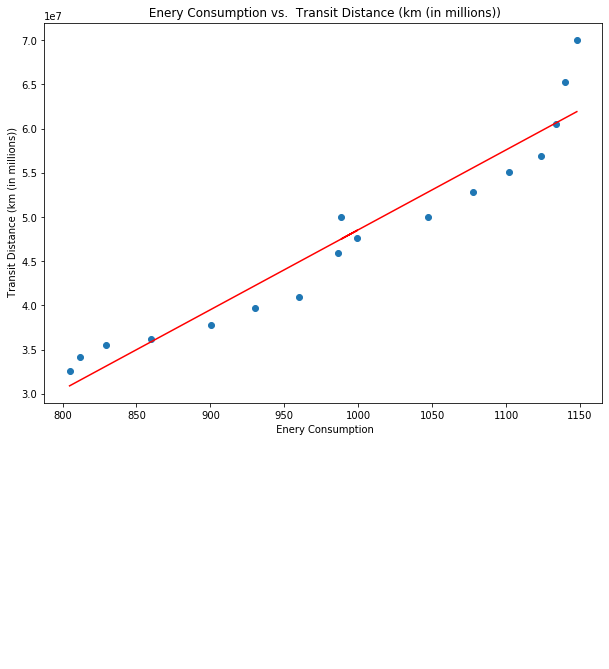

In [33]:
fig, ax = plt.subplots(figsize=(10,7))

line = lin_reg(merged_df["Consumption"],merged_df["Value"],' Enery Consumption',' Transit Distance (km (in millions))')
plt.annotate(line,(950,3.4),fontsize=14,color="red");

plt.savefig('../Images/Consupmtion_vs_Transit.png')


The r-squared is: 0.9708627051275246


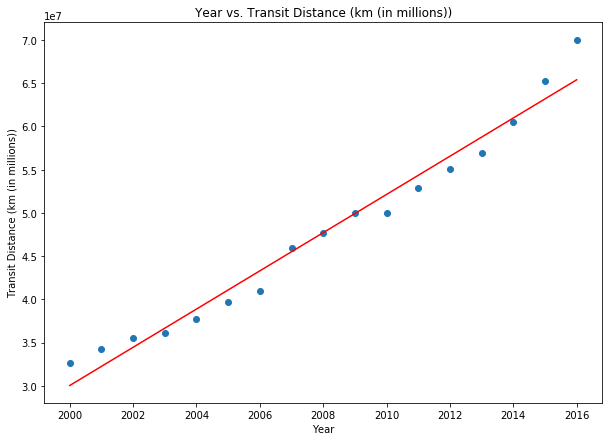

In [34]:
fig, ax = plt.subplots(figsize=(10,7))

line = lin_reg(merged_df["Year"],merged_df["Value"],'Year','Transit Distance (km (in millions))')
plt.savefig('../Images/Year_vs_Transit.png')


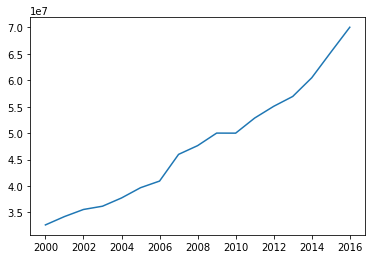

In [40]:
x_axis = merged_df["Year"]
y_axis = merged_df["Value"]
plt.plot(x_axis,y_axis)

In [ ]:
width = 0.35
plt.bar(merged_df["Year"], width, label='Years')
plt.ylabel('')